<a href="https://colab.research.google.com/github/julidoominguez/SeriesdeTiempoAustral/blob/main/TP_series_temporales_b%C3%BAsquedas_de_palabra_%22dieta%22_en_google_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preparación el entorno

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.5 MB/s eta 0:00:00


In [ ]:
# manipulación de data frames y EDA
import pandas as pd
import numpy as np
from datetime import timedelta                                 # diferencia de dos fechas

# visualización
import matplotlib.pyplot as plt
import seaborn as sns

# paquetes estadísticos - modelado de series temporales
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import statsmodels.api as sm                                   # modelos estadísticos
# !pip install pmdarima
import pmdarima as pm                                          # modelado automático SARIMA
from statsmodels.tsa.arima_model import ARIMA                  # modelo ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX         # modelo SARIMAX
from pylab import rcParams                                     # descomposicion de series temporales
from statsmodels.tsa.stattools import adfuller, kpss           # test Dickey-Fuller y KPSS
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf  # plot the (P)ACF

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
!pip install gspread
!pip install gspread-dataframe
!pip install --upgrade gspread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2


### Preparación de los datos

In [ ]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1gX5B1wbTrI83GP68LnynSr1Vl3xJp-XQq63o4QPwKdU/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
df_dieta = pd.read_csv(csv_url)


print(df_dieta.head())



         date  dieta  dietetica  isPartial
0  2018-01-01     56          0      False
1  2018-01-02     78          3      False
2  2018-01-03     66          3      False
3  2018-01-04     52          3      False
4  2018-01-05     45          2      False


In [ ]:
df_dieta.isnull().sum()

date         0
dieta        0
dietetica    0
isPartial    0
dtype: int64

In [ ]:
df= df_dieta[["date", "dieta"]]

In [ ]:
df.dtypes

date     object
dieta     int64
dtype: object

In [ ]:
df.head()

,date,dieta
0,2018-01-01,56
1,2018-01-02,78
2,2018-01-03,66
3,2018-01-04,52
4,2018-01-05,45


In [ ]:
df["date"].isnull().sum()

0

In [ ]:
df['date'].nunique()

2378

In [ ]:
import pandas as pd

# Mostrar el tipo de dato de la columna 'date' antes de la conversión
print("Antes de la conversión:", df['date'].dtype)

# Mostrar las primeras filas antes de la conversión para ver el formato de las fechas
print("Antes de la conversión, primeras filas:\n", df['date'].head())

# Intentar inferir el formato de las fechas automáticamente
try:
    # Convertir la columna 'date' a formato datetime sin especificar formato
    df['date'] = pd.to_datetime(df['date'], errors='raise')
except Exception as e:
    print(f"Error al convertir la columna 'date': {e}")

# Si aún hay valores nulos, es posible que necesites un formato específico
if df['date'].isnull().sum() > 0:
    # Especificar un formato conocido de las fechas si es posible
    # Ejemplo: para el formato 'dd-mm-yyyy'
    try:
        df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
    except Exception as e:
        print(f"Error al convertir la columna 'date' con formato especificado: {e}")

# Mostrar las primeras filas del DataFrame para verificar las conversiones
print("Después de la conversión, primeras filas:\n", df.head())

# Mostrar el tipo de dato de la columna 'date' después de la conversión
print("Después de la conversión:", df['date'].dtype)

# Verificar si hay valores nulos después de la conversión
print("Valores nulos en la columna 'date':", df['date'].isnull().sum())


Antes de la conversión: object
Antes de la conversión, primeras filas:
 0    2018-01-01
1    2018-01-02
2    2018-01-03
3    2018-01-04
4    2018-01-05
Name: date, dtype: object
Después de la conversión, primeras filas:
         date  dieta
0 2018-01-01     56
1 2018-01-02     78
2 2018-01-03     66
3 2018-01-04     52
4 2018-01-05     45
Después de la conversión: datetime64[ns]
Valores nulos en la columna 'date': 0


In [ ]:
df.shape

(2378, 2)

In [ ]:
df.dtypes

date     datetime64[ns]
dieta             int64
dtype: object

In [ ]:
df.dieta.describe()

count   2378.00
mean      63.46
std       13.85
min       22.00
25%       54.00
50%       63.00
75%       73.00
max      100.00
Name: dieta, dtype: float64

In [ ]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1FSIizX5kpfBN14TNLekfFVNDO0dHJospR8aM0CNkQlg/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
df_ventas_vitalcer = pd.read_csv(csv_url)


print(df_ventas_vitalcer.head())

   Nro       Fecha       Hora         Comprobante               Descripción  \
0  165  15/11/2019   08:23 pm  FACTURA C-00000022  { CAE: 69465360611171} -   
1  164  15/11/2019   08:09 pm   REMITO X-00000140                       NaN   
2  163  15/11/2019   08:01 pm   REMITO X-00000139                       NaN   
3  162  15/11/2019   07:45 pm   REMITO X-00000138                       NaN   
4  161  15/11/2019   07:44 pm  FACTURA C-00000021  { CAE: 69465358657978} -   

            Cliente       Monto  
0  Consumidor Final  $ 1.164,60  
1  Consumidor Final    $ 705,83  
2  Consumidor Final    $ 320,00  
3  Consumidor Final    $ 125,00  
4  Consumidor Final    $ 260,00  


In [ ]:
# Convertir la columna Monto a tipo numérico
df_ventas_vitalcer['Monto'] = df_ventas_vitalcer['Monto'].str.replace('$', '', regex=False)  # Eliminar símbolo de moneda
df_ventas_vitalcer['Monto'] = df_ventas_vitalcer['Monto'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)  # Reemplazar comas y puntos
df_ventas_vitalcer['Monto'] = df_ventas_vitalcer['Monto'].astype(float)  # Convertir a float

# Convertir la columna Fecha a tipo datetime
df_ventas_vitalcer['Fecha'] = pd.to_datetime(df_ventas_vitalcer['Fecha'], format='%d/%m/%Y')

# Mostrar las primeras filas del DataFrame para verificar las conversiones
print(df_ventas_vitalcer.head())

   Nro      Fecha       Hora         Comprobante               Descripción  \
0  165 2019-11-15   08:23 pm  FACTURA C-00000022  { CAE: 69465360611171} -   
1  164 2019-11-15   08:09 pm   REMITO X-00000140                       NaN   
2  163 2019-11-15   08:01 pm   REMITO X-00000139                       NaN   
3  162 2019-11-15   07:45 pm   REMITO X-00000138                       NaN   
4  161 2019-11-15   07:44 pm  FACTURA C-00000021  { CAE: 69465358657978} -   

            Cliente   Monto  
0  Consumidor Final 1164.60  
1  Consumidor Final  705.83  
2  Consumidor Final  320.00  
3  Consumidor Final  125.00  
4  Consumidor Final  260.00  


In [ ]:
print(df_ventas_vitalcer['Fecha'].dtype)

datetime64[ns]


In [ ]:
print(df['date'].dtype)

datetime64[ns]


In [ ]:
# Extraer los valores únicos de la columna 'date' del DataFrame de facturación
fechas_facturacion = df_ventas_vitalcer['Fecha'].unique()

# Filtrar el DataFrame de búsquedas para que solo contenga las filas con fechas en fechas_facturacion
df_filtrado = df[df['date'].isin(fechas_facturacion)]

In [ ]:
df_filtrado.head()

,date,dieta
683,2019-11-15,62
684,2019-11-16,60
687,2019-11-19,88
688,2019-11-20,73
689,2019-11-21,68


In [ ]:
df_filtrado.isnull().sum()

date     0
dieta    0
dtype: int64

In [ ]:
df_filtrado.shape

(1380, 2)

In [ ]:
df.shape

(2378, 2)

In [ ]:
df_ventas_vitalcer['Fecha'].nunique()

1380

In [ ]:
# Extraer las fechas de facturación y de búsquedas
fechas_facturacion = df_ventas_vitalcer['Fecha']
fechas_busquedas = df['date']

# Encontrar fechas en df_facturacion que no están en df_busquedas
fechas_sin_busqueda = fechas_facturacion[~fechas_facturacion.isin(fechas_busquedas)]

# Mostrar las fechas de facturación sin búsqueda
print("Fechas de facturación sin búsqueda:")
print(fechas_sin_busqueda)


Fechas de facturación sin búsqueda:
Series([], Name: Fecha, dtype: datetime64[ns])


In [ ]:
df_filtrado.to_csv('df_google_trends_filtrado.csv', index=False)

### Analizo la serie

In [ ]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1y9nkBOyfktgLYkoJIBpenGepizO-x6tHnK36KWNLmos/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
df_filtrado = pd.read_csv(csv_url)


print(df_filtrado.head())

         date  dieta
0  2019-11-15     62
1  2019-11-16     60
2  2019-11-19     88
3  2019-11-20     73
4  2019-11-21     68


<ipython-input-7-379c2a40cb9f>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


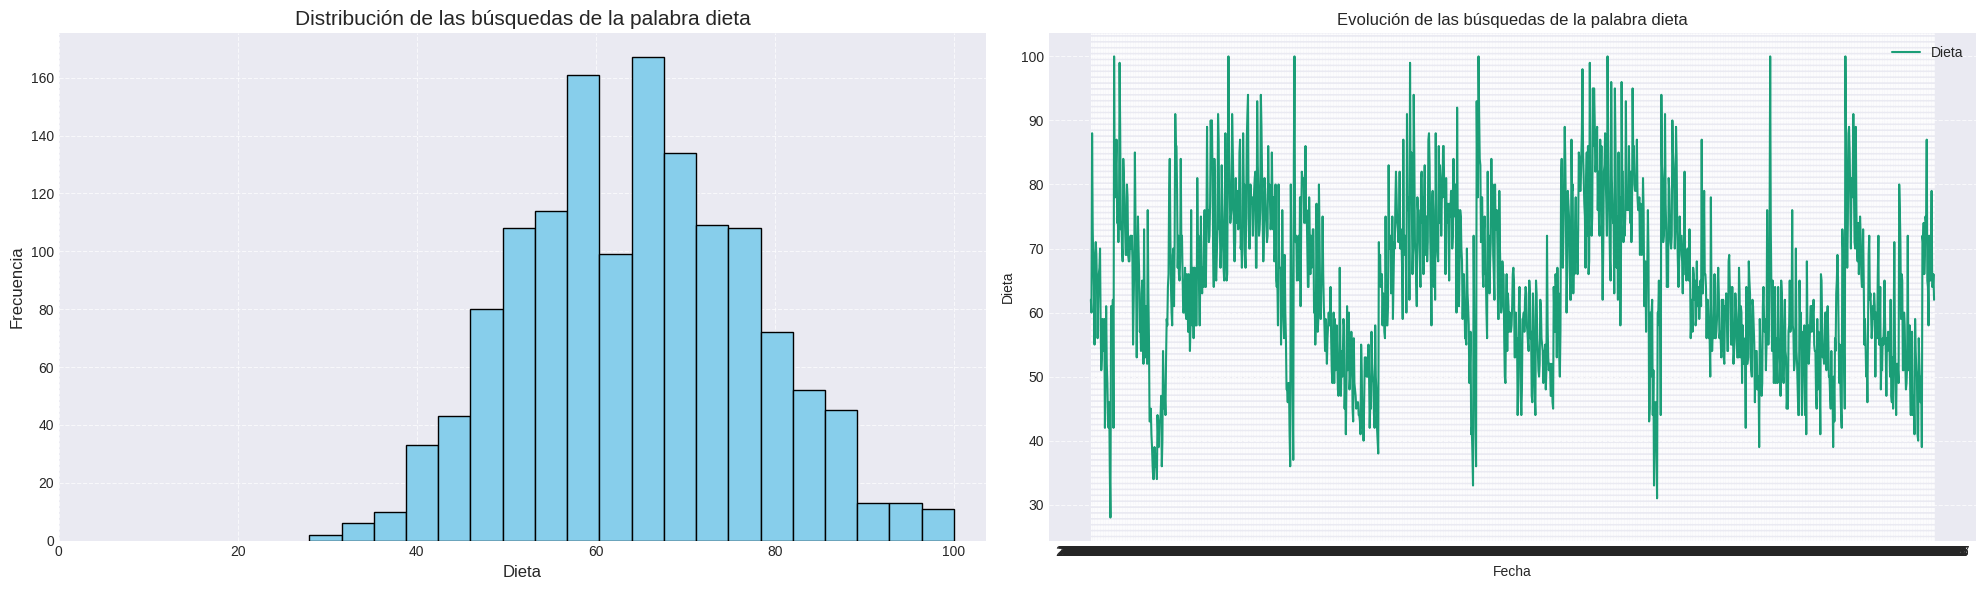

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, FuncFormatter

# Función para formatear los valores del eje
def format_func(value, tick_number):
    return f'{value:,.0f}'

# Función para graficar la serie
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.color_palette('Dark2'))
    xs = series['date']
    ys = series['dieta']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Establecer estilo de gráfico
plt.style.use('seaborn-darkgrid')

# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico 1: Histograma
df_filtrado['dieta'].plot(kind='hist', bins=20, ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Distribución de las búsquedas de la palabra dieta', fontsize=15)
ax1.set_xlabel('Dieta', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlim(left=0)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.set_major_formatter(FuncFormatter(format_func))
ax1.grid(True, linestyle='--', alpha=0.7)

# Gráfico 2: Serie temporal
df_sorted = df_filtrado.sort_values('date', ascending=True)
_plot_series(df_sorted, 'Dieta')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Dieta')
ax2.set_title('Evolución de las búsquedas de la palabra dieta')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.yaxis.set_major_formatter(FuncFormatter(format_func))
sns.despine(ax=ax2)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


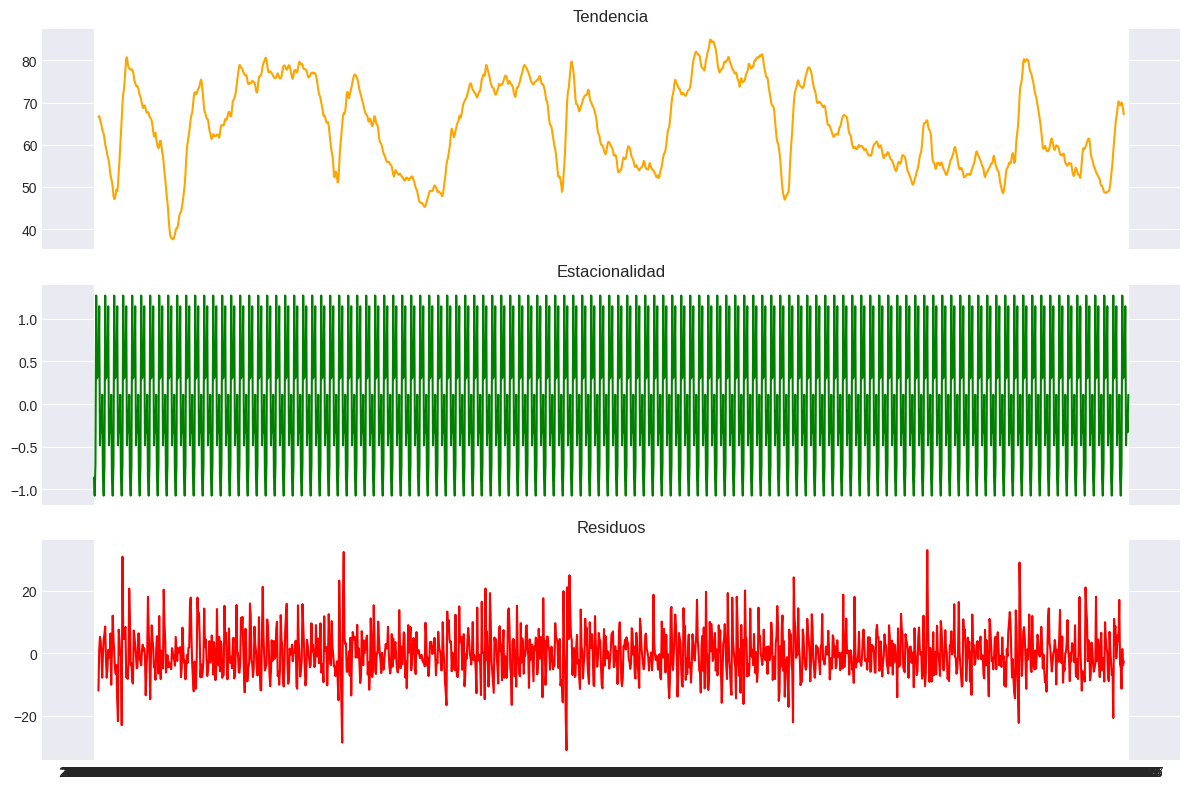

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Asegurarse de que las fechas estén ordenadas
df_sorted = df_filtrado.sort_values('date', ascending=True)

# Realizar la descomposición de la serie temporal
decomposition = seasonal_decompose(df_sorted['dieta'], model='additive', period=12)

# Graficar los componentes de la descomposición
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Tendencia
axs[0].plot(df_sorted['date'], decomposition.trend, color='orange')
axs[0].set_title('Tendencia')
axs[0].legend().set_visible(False)

# Estacionalidad
axs[1].plot(df_sorted['date'], decomposition.seasonal, color='green')
axs[1].set_title('Estacionalidad')
axs[1].legend().set_visible(False)

# Ajustar límites del eje Y para mejorar la visualización
axs[1].set_ylim([decomposition.seasonal.min() * 1.1, decomposition.seasonal.max() * 1.1])

# Residuos
axs[2].plot(df_sorted['date'], decomposition.resid, color='red')
axs[2].set_title('Residuos')
axs[2].legend().set_visible(False)

plt.tight_layout()
plt.show()



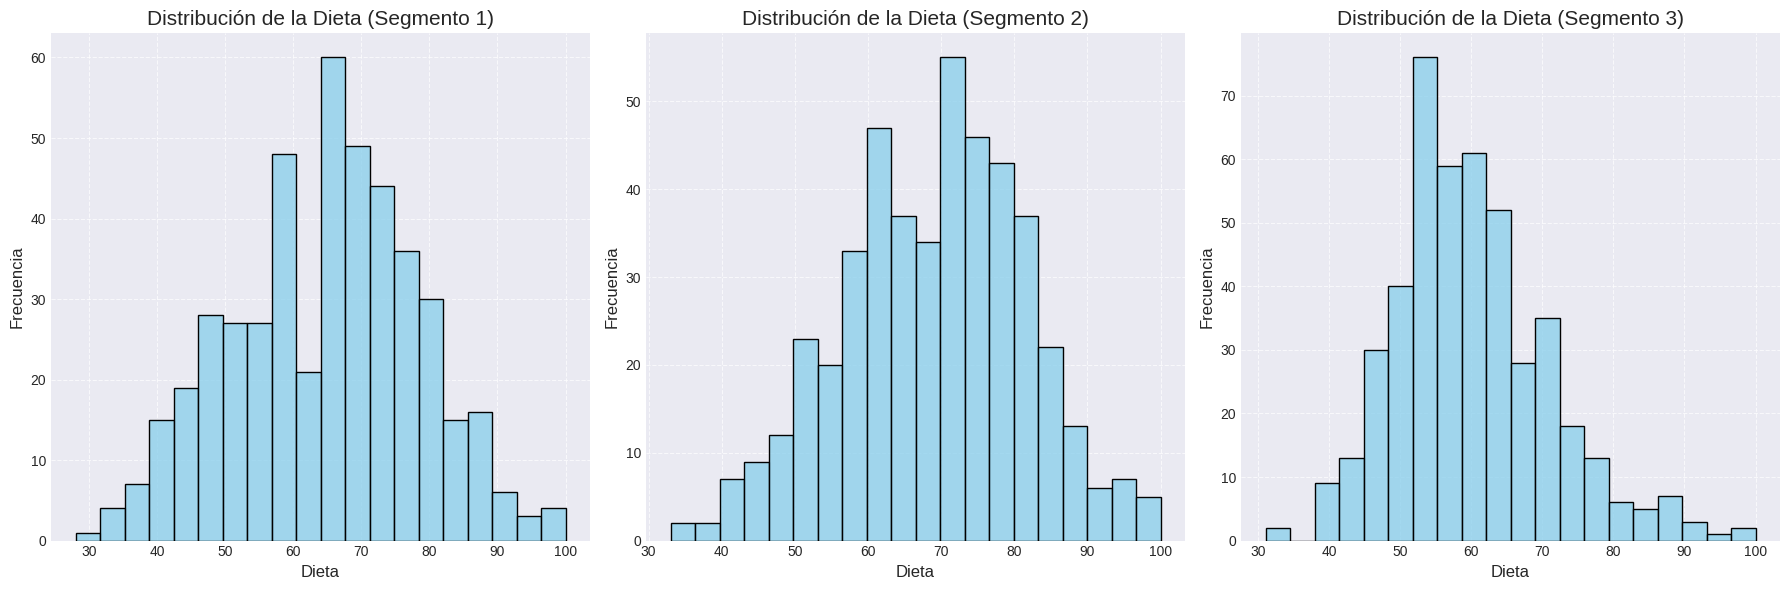

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Función para formatear los valores del eje X
def format_func(value, tick_number):
    return f'{value:,.0f}'

# Asegurarse de que las fechas estén ordenadas
df_sorted = df_filtrado.sort_values('date', ascending=True)

# Dividir el DataFrame en tres segmentos
n = len(df_sorted)
segment1 = df_sorted.iloc[:n//3]
segment2 = df_sorted.iloc[n//3:2*n//3]
segment3 = df_sorted.iloc[2*n//3:]

# Crear la figura y los ejes para los histogramas
fig, axs = plt.subplots(1, 3, figsize=(18, 6), layout='constrained')

# Graficar los histogramas
sns.histplot(segment1['dieta'], bins=20, ax=axs[0], color='skyblue', edgecolor='black')
sns.histplot(segment2['dieta'], bins=20, ax=axs[1], color='skyblue', edgecolor='black')
sns.histplot(segment3['dieta'], bins=20, ax=axs[2], color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
axs[0].set_title('Distribución de la Dieta (Segmento 1)', fontsize=15)
axs[1].set_title('Distribución de la Dieta (Segmento 2)', fontsize=15)
axs[2].set_title('Distribución de la Dieta (Segmento 3)', fontsize=15)
for ax in axs:
    ax.set_xlabel('Dieta', fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)
    ax.xaxis.set_major_formatter(FuncFormatter(format_func))
    sns.despine(ax=ax)
    ax.grid(True, linestyle='--', alpha=0.7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


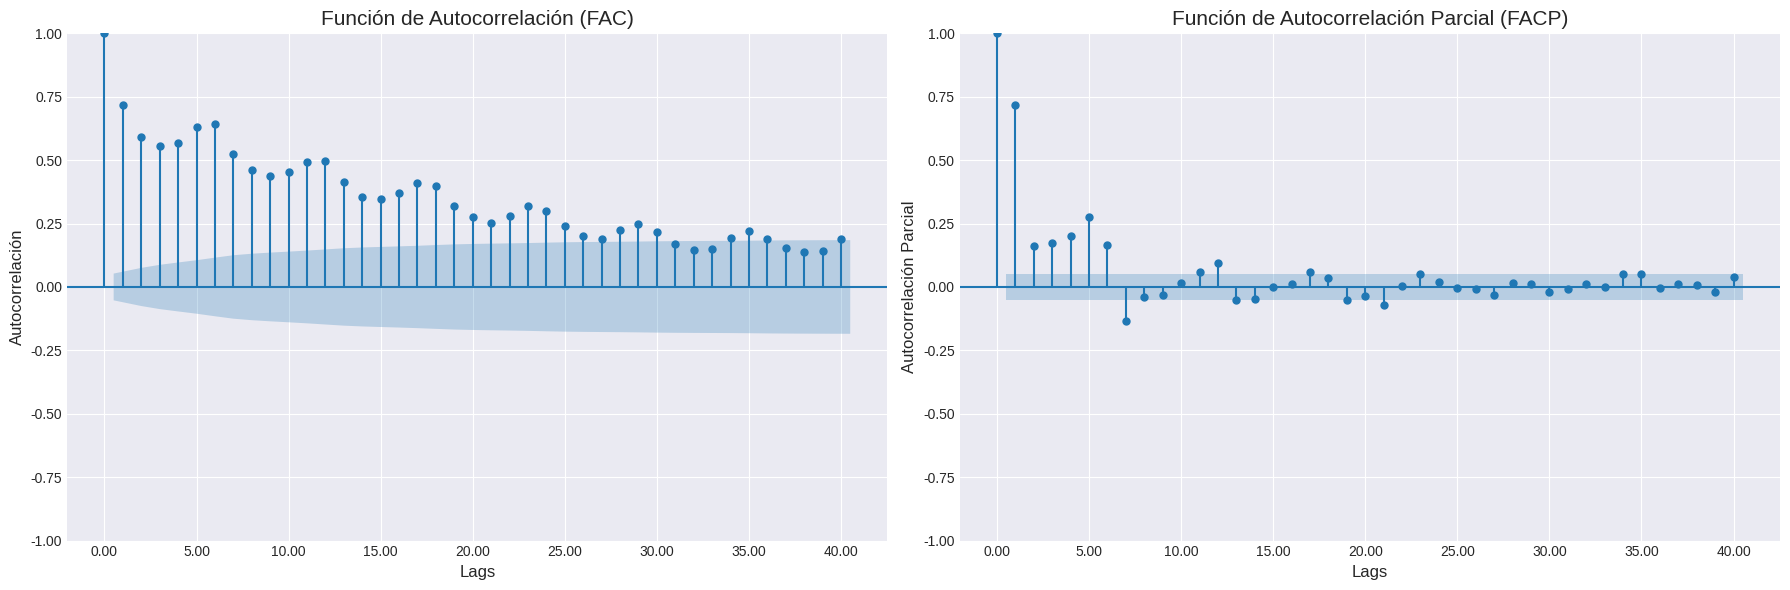

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.ticker import FuncFormatter

# Función para formatear los valores del eje Y
def format_func(value, tick_number):
    return f'{value:,.2f}'

# Ordenar el DataFrame por fecha
df_sorted = df_filtrado.sort_values('date', ascending=True)

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(18, 6), layout='constrained')

# Graficar FAC
plot_acf(df_sorted['dieta'], ax=axs[0], lags=40, alpha=0.05)
axs[0].set_title('Función de Autocorrelación (FAC)', fontsize=15)
axs[0].set_xlabel('Lags', fontsize=12)
axs[0].set_ylabel('Autocorrelación', fontsize=12)
axs[0].xaxis.set_major_formatter(FuncFormatter(format_func))
axs[0].yaxis.set_major_formatter(FuncFormatter(format_func))
axs[0].tick_params(axis='both', which='major', labelsize=10)
sns.despine(ax=axs[0])

# Graficar FACP
plot_pacf(df_sorted['dieta'], ax=axs[1], lags=40, alpha=0.05)
axs[1].set_title('Función de Autocorrelación Parcial (FACP)', fontsize=15)
axs[1].set_xlabel('Lags', fontsize=12)
axs[1].set_ylabel('Autocorrelación Parcial', fontsize=12)
axs[1].xaxis.set_major_formatter(FuncFormatter(format_func))
axs[1].yaxis.set_major_formatter(FuncFormatter(format_func))
axs[1].tick_params(axis='both', which='major', labelsize=10)
sns.despine(ax=axs[1])

# Ajustar el layout
plt.tight_layout()
plt.show()


In [ ]:
!pip install arch
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import PhillipsPerron

# Ordenar el DataFrame por fecha
df_sorted = df_filtrado.sort_values('date', ascending=True)

# Extraer la serie
series = df_sorted['dieta']

# Prueba de Dickey-Fuller aumentada (ADF)
adf_result = adfuller(series)
print('Prueba ADF:')
print('Estadístico ADF:', adf_result[0])
print('Valor p:', adf_result[1])
print('Valores críticos:', adf_result[4])
print()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 9.9 MB/s eta 0:00:00
Prueba ADF:
Estadístico ADF: -4.886411545595168
Valor p: 3.706171208712935e-05
Valores críticos: {'1%': -3.435170967430817, '5%': -2.8636690928667523, '10%': -2.5679035297726274}



In [ ]:
pp_result = PhillipsPerron(series)
print('Prueba PP:')
print('Estadístico PP:', pp_result.stat)
print('Valor p:', pp_result.pvalue)
print('Valores críticos:', pp_result.critical_values)
print()

Prueba PP:
Estadístico PP: -20.821412061196014
Valor p: 0.0
Valores críticos: {'1%': -3.4351009168670035, '5%': -2.863638180853028, '10%': -2.5678870681532424}



In [ ]:
# Prueba Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
kpss_result, p_value, lags, crit = kpss(series, regression='c')
print('Prueba KPSS:')
print('Estadístico KPSS:', kpss_result)
print('Valor p:', p_value)
print('Valores críticos:', crit)

Prueba KPSS:
Estadístico KPSS: 0.45059031902777047
Valor p: 0.05534900041906446
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


### Ajuste del Mejor Modelo SARIMA:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [ ]:
# Ordenar el DataFrame por fecha
df_sorted = df_filtrado.sort_values('date', ascending=True)

# Ajuste automático del modelo SARIMA con estacionalidad de 6 días (m=6)
sarima_model = auto_arima(df_sorted['dieta'],
                          seasonal=True, m=6,
                          trace=True, error_action='ignore',
                          suppress_warnings=True)

# Resumen del mejor modelo encontrado
print(sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[6] intercept   : AIC=9734.080, Time=8.92 sec
 ARIMA(0,1,0)(0,0,0)[6] intercept   : AIC=10191.776, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[6] intercept   : AIC=9979.229, Time=2.15 sec
 ARIMA(0,1,1)(0,0,1)[6] intercept   : AIC=9827.002, Time=2.19 sec
 ARIMA(0,1,0)(0,0,0)[6]             : AIC=10189.776, Time=0.09 sec
 ARIMA(2,1,2)(0,0,1)[6] intercept   : AIC=9758.994, Time=5.66 sec
 ARIMA(2,1,2)(1,0,0)[6] intercept   : AIC=9746.444, Time=6.55 sec
 ARIMA(2,1,2)(2,0,1)[6] intercept   : AIC=9736.056, Time=21.13 sec
 ARIMA(2,1,2)(1,0,2)[6] intercept   : AIC=9736.049, Time=15.12 sec
 ARIMA(2,1,2)(0,0,0)[6] intercept   : AIC=9794.260, Time=0.98 sec
 ARIMA(2,1,2)(0,0,2)[6] intercept   : AIC=9748.656, Time=4.89 sec
 ARIMA(2,1,2)(2,0,0)[6] intercept   : AIC=9738.561, Time=7.32 sec
 ARIMA(2,1,2)(2,0,2)[6] intercept   : AIC=9737.487, Time=11.91 sec
 ARIMA(1,1,2)(1,0,1)[6] intercept   : AIC=9732.173, Time=2.77 sec
 ARIMA(1,1,2)(0,0,1)[6] inte

Analisis extra normalidad de los residuos:

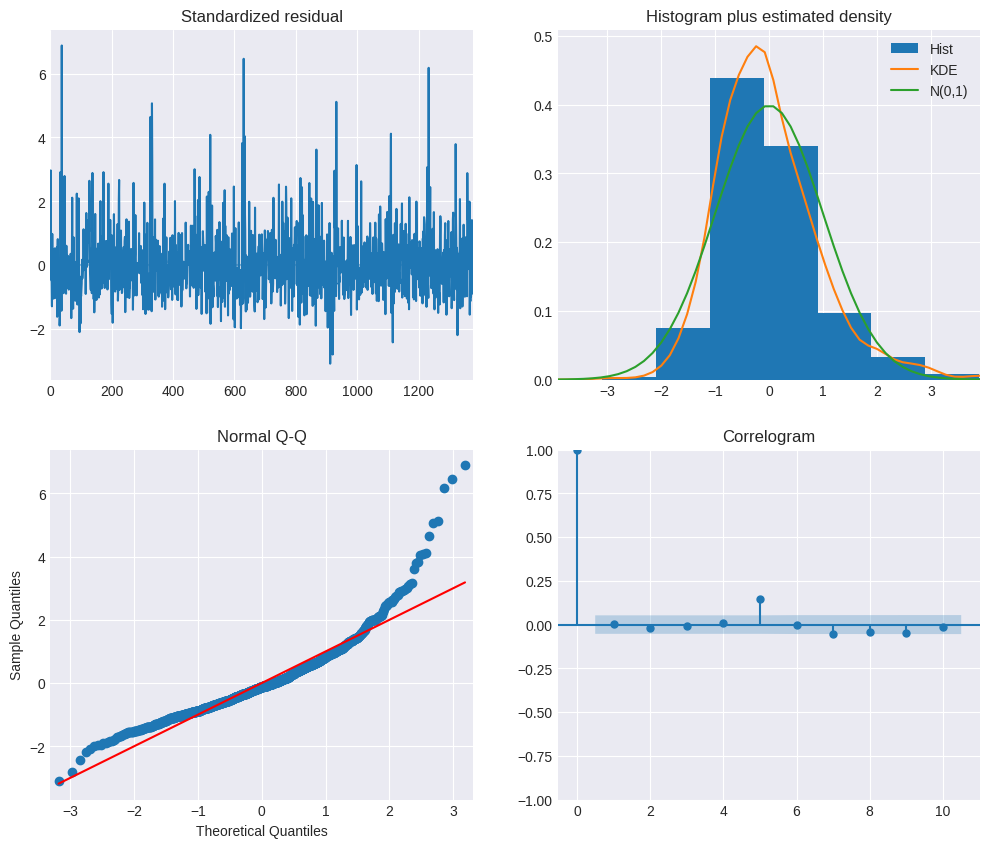

In [ ]:
# Diagnostico grafico los residuos del modelo
fig_res_2 = sarima_model.plot_diagnostics(figsize=(12,10))

In [ ]:
from scipy.stats import shapiro

# Obtener los residuos del modelo ajustado
residuals = sarima_model.resid()

# Aplicar el test de Shapiro-Wilk
shapiro_test = shapiro(residuals)
print('Test de Shapiro-Wilk:')
print(f'Estadístico: {shapiro_test.statistic}, p-valor: {shapiro_test.pvalue}')

Test de Shapiro-Wilk:
Estadístico: 0.9012224674224854, p-valor: 6.212551666220113e-29


In [ ]:
from scipy.stats import boxcox

# Aplicar la transformación de Box-Cox a los datos
df_filtrado['dieta_boxcox'], lambda_boxcox = boxcox(df_filtrado['dieta'])

# Ajuste del modelo ARIMA/SARIMA con los datos transformados
boxcox_model = auto_arima(df_filtrado['dieta_boxcox'],
                          seasonal=True, m=6,
                          trace=True, error_action='ignore',
                          suppress_warnings=True)

# Obtener los residuos del modelo ajustado
boxcox_residuals = boxcox_model.resid()

# Aplicar el test de Shapiro-Wilk a los residuos transformados
shapiro_test_boxcox = shapiro(boxcox_residuals)
print(f'Test de Shapiro-Wilk (Transformación de Box-Cox): Estadístico: {shapiro_test_boxcox.statistic}, p-valor: {shapiro_test_boxcox.pvalue}')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[6] intercept   : AIC=6230.407, Time=11.48 sec
 ARIMA(0,1,0)(0,0,0)[6] intercept   : AIC=6675.262, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[6] intercept   : AIC=6469.228, Time=2.18 sec
 ARIMA(0,1,1)(0,0,1)[6] intercept   : AIC=6319.085, Time=2.47 sec
 ARIMA(0,1,0)(0,0,0)[6]             : AIC=6673.262, Time=0.11 sec
 ARIMA(2,1,2)(0,0,1)[6] intercept   : AIC=6252.197, Time=3.16 sec
 ARIMA(2,1,2)(1,0,0)[6] intercept   : AIC=6241.119, Time=6.05 sec
 ARIMA(2,1,2)(2,0,1)[6] intercept   : AIC=6232.383, Time=20.41 sec
 ARIMA(2,1,2)(1,0,2)[6] intercept   : AIC=6232.376, Time=18.12 sec
 ARIMA(2,1,2)(0,0,0)[6] intercept   : AIC=6284.475, Time=2.48 sec
 ARIMA(2,1,2)(0,0,2)[6] intercept   : AIC=6243.036, Time=9.91 sec
 ARIMA(2,1,2)(2,0,0)[6] intercept   : AIC=6234.364, Time=13.03 sec
 ARIMA(2,1,2)(2,0,2)[6] intercept   : AIC=6233.885, Time=20.67 sec
 ARIMA(1,1,2)(1,0,1)[6] intercept   : AIC=6228.043, Time=6.92 sec
 ARIMA(1,1,2)(0,0,1)[6] inte

In [ ]:
print(boxcox_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1380
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 6)   Log Likelihood               -3107.773
Date:                           Sun, 07 Jul 2024   AIC                           6225.545
Time:                                   17:18:14   BIC                           6251.691
Sample:                                        0   HQIC                          6235.327
                                          - 1380                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3180      0.036      8.843      0.000       0.248       0.388
ma.L1         -0.8398      0.020    -42.830

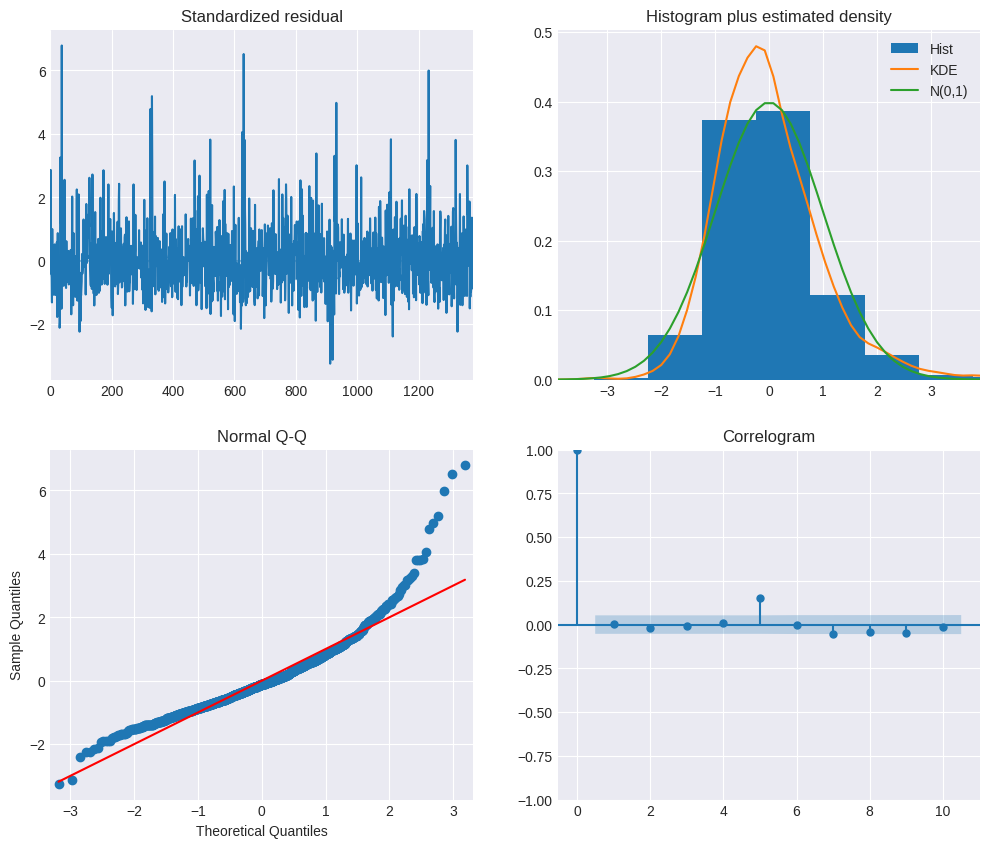

In [ ]:
fig_res_2 = boxcox_model.plot_diagnostics(figsize=(12,10))

A continuacion, vamos a aplicar la transformación logarítmica para ver si con esto logramos resolver el problema de los residuos:

In [ ]:
from scipy.stats import shapiro

# Aplicar la transformación logarítmica a los datos
df_filtrado['dieta_log'] = np.log(df_filtrado['dieta'])

# Ajuste del modelo ARIMA/SARIMA con los datos transformados
log_model = auto_arima(df_filtrado['dieta_log'],
                       seasonal=True, m=6,
                       trace=True, error_action='ignore',
                       suppress_warnings=True)

# Obtener los residuos del modelo ajustado
log_residuals = log_model.resid()

# Aplicar el test de Shapiro-Wilk a los residuos transformados
shapiro_test_log = shapiro(log_residuals)
print(f'Test de Shapiro-Wilk (Transformación Logarítmica): Estadístico: {shapiro_test_log.statistic}, p-valor: {shapiro_test_log.pvalue}')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[6] intercept   : AIC=-1682.413, Time=5.71 sec
 ARIMA(0,1,0)(0,0,0)[6] intercept   : AIC=-1264.772, Time=0.16 sec
 ARIMA(1,1,0)(1,0,0)[6] intercept   : AIC=-1456.700, Time=1.69 sec
 ARIMA(0,1,1)(0,0,1)[6] intercept   : AIC=-1605.006, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[6]             : AIC=-1266.772, Time=0.15 sec
 ARIMA(2,1,2)(0,0,1)[6] intercept   : AIC=-1667.722, Time=8.11 sec
 ARIMA(2,1,2)(1,0,0)[6] intercept   : AIC=-1675.392, Time=8.80 sec
 ARIMA(2,1,2)(2,0,1)[6] intercept   : AIC=-1680.299, Time=10.55 sec
 ARIMA(2,1,2)(1,0,2)[6] intercept   : AIC=-1680.316, Time=12.46 sec
 ARIMA(2,1,2)(0,0,0)[6] intercept   : AIC=-1643.019, Time=3.93 sec
 ARIMA(2,1,2)(0,0,2)[6] intercept   : AIC=-1674.174, Time=8.78 sec
 ARIMA(2,1,2)(2,0,0)[6] intercept   : AIC=-1679.990, Time=11.49 sec
 ARIMA(2,1,2)(2,0,2)[6] intercept   : AIC=-1678.625, Time=11.86 sec
 ARIMA(1,1,2)(1,0,1)[6] intercept   : AIC=-1677.401, Time=5.09 sec
 ARIMA(2,1,1)(1

In [ ]:
print(log_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1380
Model:             SARIMAX(5, 1, 4)x(2, 0, [], 6)   Log Likelihood                 877.489
Date:                            Mon, 08 Jul 2024   AIC                          -1730.978
Time:                                    22:40:27   BIC                          -1668.228
Sample:                                         0   HQIC                         -1707.503
                                           - 1380                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9196      0.059    -15.464      0.000      -1.036      -0.803
ar.L2         -0.8342      0.052   

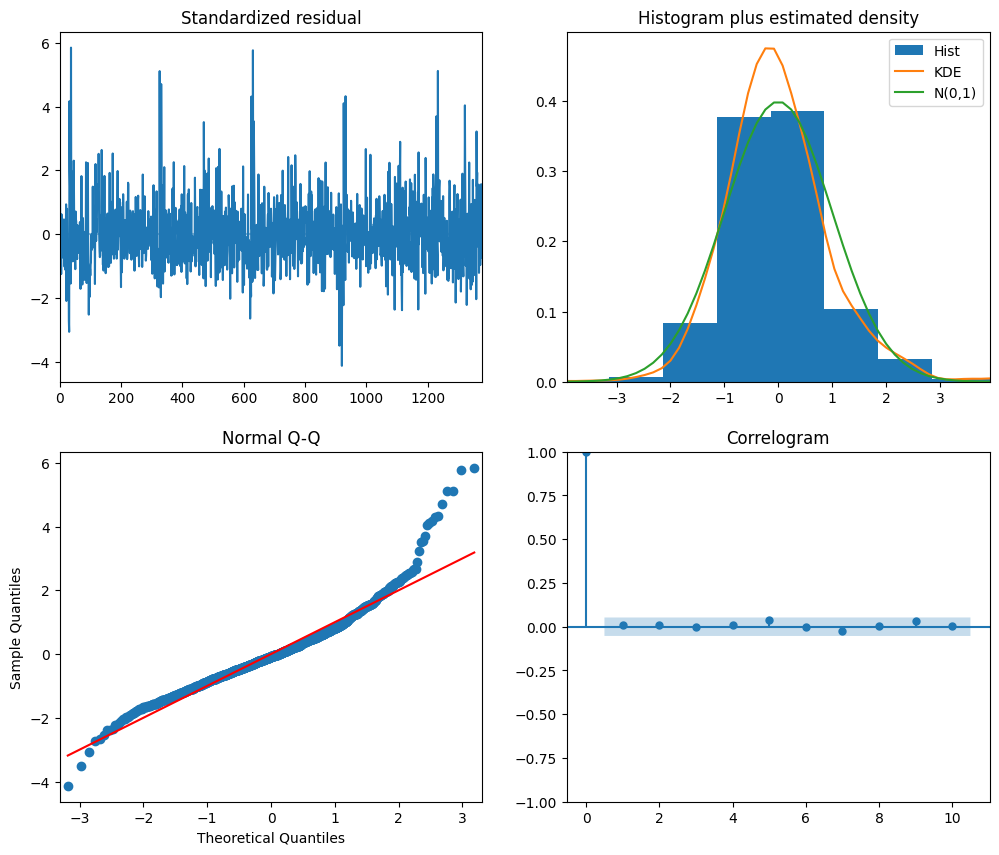

In [ ]:
fig_res_2 = log_model.plot_diagnostics(figsize=(12,10))

### Evaluación de métricas de performance teniendo en cuenta el entrenamiento del modelo entre Training Set y Testing Set

Transformación BOX-COX

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox

# Ordenar el DataFrame por fecha
df_sorted = df_filtrado.sort_values('date', ascending=True)

# Separar el dataset en entrenamiento (80%) y prueba (20%)
train_size = int(len(df_sorted) * 0.8)
train, test = df_sorted.iloc[:train_size], df_sorted.iloc[train_size:]

# Aplicar la transformación de Box-Cox
train['dieta_boxcox'], lam = boxcox(train['dieta'])

# Ajuste del modelo SARIMA en el conjunto de entrenamiento con la transformación Box-Cox
boxcox_model_with_train = auto_arima(train['dieta_boxcox'],
                          seasonal=True, m=6,
                          trace=True, error_action='ignore',
                          suppress_warnings=True)

<ipython-input-13-d824eacd89ce>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['dieta_boxcox'], lam = boxcox(train['dieta'])


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[6] intercept   : AIC=8159.804, Time=8.78 sec
 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=9191.554, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[6] intercept   : AIC=8237.640, Time=1.83 sec
 ARIMA(0,0,1)(0,0,1)[6] intercept   : AIC=8465.540, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[6]             : AIC=12706.927, Time=0.04 sec
 ARIMA(2,0,2)(0,0,1)[6] intercept   : AIC=8169.602, Time=3.77 sec
 ARIMA(2,0,2)(1,0,0)[6] intercept   : AIC=8155.229, Time=3.76 sec
 ARIMA(2,0,2)(0,0,0)[6] intercept   : AIC=8243.251, Time=3.88 sec
 ARIMA(2,0,2)(2,0,0)[6] intercept   : AIC=8145.039, Time=6.37 sec
 ARIMA(2,0,2)(2,0,1)[6] intercept   : AIC=inf, Time=9.46 sec
 ARIMA(1,0,2)(2,0,0)[6] intercept   : AIC=8142.991, Time=5.54 sec
 ARIMA(1,0,2)(1,0,0)[6] intercept   : AIC=8151.663, Time=3.49 sec
 ARIMA(1,0,2)(2,0,1)[6] intercept   : AIC=inf, Time=8.60 sec
 ARIMA(1,0,2)(1,0,1)[6] intercept   : AIC=8139.632, Time=4.02 sec
 ARIMA(1,0,2)(0,0,1)[6] intercept   : AIC=

In [ ]:
print (boxcox_model_with_train.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1104
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 6)   Log Likelihood               -4060.655
Date:                           Sun, 07 Jul 2024   AIC                           8139.310
Time:                                   18:09:15   BIC                           8184.370
Sample:                                        0   HQIC                          8156.354
                                          - 1104                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1289      0.313      0.413      0.680      -0.484       0.741
ar.L1          0.9493      0.016     58.850

Transformación Logaritmica

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Asegurarse de que la columna 'FECHA' es tipo datetime
df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])

# Ordenar el DataFrame por fecha
df_filtrado = df_filtrado.sort_values('date', ascending=True)

# Separar el dataset en entrenamiento (80%) y prueba (20%)
train_size = int(len(df_filtrado) * 0.8)
train, test = df_filtrado.iloc[:train_size].copy(), df_filtrado.iloc[train_size:].copy()

# Aplicar la transformación logarítmica
train['dieta'] = np.log(train['dieta'])
test['dieta'] = np.log(test['dieta'])

# Ajuste del modelo SARIMA en el conjunto de entrenamiento con la transformación logarítmica
log_model_with_train = auto_arima(train['dieta'],
                                  seasonal=True, m=3,
                                  trace=True, error_action='ignore',
                                  suppress_warnings=True)

# Resumen del modelo ajustado
print(log_model_with_train.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[3] intercept   : AIC=-1012.878, Time=4.67 sec
 ARIMA(0,0,0)(0,0,0)[3] intercept   : AIC=-333.079, Time=0.22 sec
 ARIMA(1,0,0)(1,0,0)[3] intercept   : AIC=-742.126, Time=2.49 sec
 ARIMA(0,0,1)(0,0,1)[3] intercept   : AIC=-936.422, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[3]             : AIC=6290.073, Time=0.06 sec
 ARIMA(2,0,2)(0,0,1)[3] intercept   : AIC=-1338.683, Time=4.73 sec
 ARIMA(2,0,2)(0,0,0)[3] intercept   : AIC=-1324.882, Time=2.29 sec
 ARIMA(2,0,2)(0,0,2)[3] intercept   : AIC=-1390.261, Time=4.55 sec
 ARIMA(2,0,2)(1,0,2)[3] intercept   : AIC=-1096.753, Time=9.35 sec
 ARIMA(1,0,2)(0,0,2)[3] intercept   : AIC=-1401.127, Time=4.31 sec
 ARIMA(1,0,2)(0,0,1)[3] intercept   : AIC=-1345.193, Time=2.62 sec
 ARIMA(1,0,2)(1,0,2)[3] intercept   : AIC=-1268.226, Time=7.48 sec
 ARIMA(1,0,2)(1,0,1)[3] intercept   : AIC=inf, Time=3.64 sec
 ARIMA(0,0,2)(0,0,2)[3] intercept   : AIC=-1283.806, Time=2.06 sec
 ARIMA(1,0,1)(0,0,2)[3] inter

Predicciones SARIMA con transformación de BOX-COX

RMSE: 13.104499881305575
MAE: 11.08980504743383


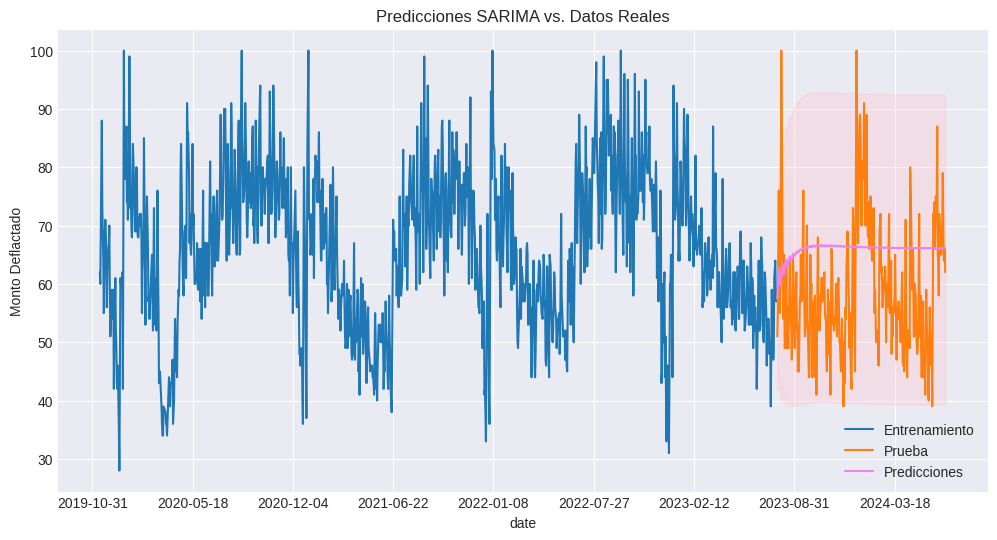

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Realizar la predicción en el conjunto de prueba con intervalo de confianza
predictions_boxcox, conf_int = boxcox_model_with_train.predict(n_periods=len(test), return_conf_int=True)
predictions_boxcox_inverse = inv_boxcox(predictions_boxcox, lam)  # Invertir la transformación
conf_int_inverse = inv_boxcox(conf_int, lam)

# Calcular las métricas de performance
rmse = np.sqrt(mean_squared_error(test['dieta'], predictions_boxcox_inverse))
mae = mean_absolute_error(test['dieta'], predictions_boxcox_inverse)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train['date'], train['dieta'], label='Entrenamiento')
plt.plot(test['date'], test['dieta'], label='Prueba')
plt.plot(test['date'], predictions_boxcox_inverse, label='Predicciones', color='violet')
plt.fill_between(test['date'],
                 conf_int_inverse[:, 0],
                 conf_int_inverse[:, 1], color='pink', alpha=0.3)

# Formatear los ejes para evitar notación científica
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel('date')
plt.ylabel('Monto Deflactado')
plt.title('Predicciones SARIMA vs. Datos Reales')
plt.legend()
plt.show()

Predicciones SARIMA con transformación Logaritmica

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Asegurarse de que la columna 'FECHA' es tipo datetime
df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])

# Ordenar el DataFrame por fecha
df_filtrado = df_filtrado.sort_values('date', ascending=True)

# Separar el dataset en entrenamiento (80%) y prueba (20%)
train_size = int(len(df_filtrado) * 0.8)
train, test = df_filtrado.iloc[:train_size].copy(), df_filtrado.iloc[train_size:].copy()

# Aplicar la transformación logarítmica
train['dieta_log'] = np.log(train['dieta'])
test['dieta_log'] = np.log(test['dieta'])

# Ajuste del modelo SARIMA en el conjunto de entrenamiento con la transformación logarítmica
log_model_with_train = auto_arima(train['dieta_log'],
                                  seasonal=True, m=3,
                                  trace=True, error_action='ignore',
                                  suppress_warnings=True)

# Resumen del modelo ajustado
print(log_model_with_train.summary())
# Ajustar el modelo SARIMA usando statsmodels en el conjunto de entrenamiento
log_model = SARIMAX(train['dieta_log'],
                    order=log_model_with_train.order,
                    seasonal_order=log_model_with_train.seasonal_order)
log_model_fit = log_model.fit(disp=False)

# Realizar predicciones en el conjunto de prueba
predictions_log = log_model_fit.get_forecast(steps=len(test))
predicted_log_values = predictions_log.predicted_mean
predicted_values = np.exp(predicted_log_values)  # Invertir la transformación logarítmica

# Evaluar las predicciones
mse = mean_squared_error(test['dieta'], predicted_values)
mae = mean_absolute_error(test['dieta'], predicted_values)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[3] intercept   : AIC=-1012.878, Time=5.31 sec
 ARIMA(0,0,0)(0,0,0)[3] intercept   : AIC=-333.079, Time=0.31 sec
 ARIMA(1,0,0)(1,0,0)[3] intercept   : AIC=-742.126, Time=3.27 sec
 ARIMA(0,0,1)(0,0,1)[3] intercept   : AIC=-936.422, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[3]             : AIC=6290.073, Time=0.04 sec
 ARIMA(2,0,2)(0,0,1)[3] intercept   : AIC=-1338.683, Time=3.32 sec
 ARIMA(2,0,2)(0,0,0)[3] intercept   : AIC=-1324.882, Time=2.22 sec
 ARIMA(2,0,2)(0,0,2)[3] intercept   : AIC=-1390.261, Time=6.24 sec
 ARIMA(2,0,2)(1,0,2)[3] intercept   : AIC=-1096.753, Time=5.62 sec
 ARIMA(1,0,2)(0,0,2)[3] intercept   : AIC=-1401.127, Time=4.33 sec
 ARIMA(1,0,2)(0,0,1)[3] intercept   : AIC=-1345.193, Time=4.28 sec
 ARIMA(1,0,2)(1,0,2)[3] intercept   : AIC=-1268.226, Time=5.59 sec
 ARIMA(1,0,2)(1,0,1)[3] intercept   : AIC=inf, Time=3.66 sec
 ARIMA(0,0,2)(0,0,2)[3] intercept   : AIC=-1283.806, Time=3.58 sec
 ARIMA(1,0,1)(0,0,2)[3] inter

In [ ]:

# Ajustar el modelo SARIMA usando statsmodels en el conjunto de entrenamiento
log_model = SARIMAX(train['dieta_log'],
                    order=log_model_with_train.order,
                    seasonal_order=log_model_with_train.seasonal_order)
log_model_fit = log_model.fit(disp=False)

# Realizar predicciones en el conjunto de prueba
predictions_log = log_model_fit.get_forecast(steps=len(test))
predicted_log_values = predictions_log.predicted_mean
predicted_values = np.exp(predicted_log_values)  # Invertir la transformación logarítmica

# Evaluar las predicciones
mse = mean_squared_error(test['dieta'], predicted_values)
mae = mean_absolute_error(test['dieta'], predicted_values)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 133.78273556847003
MAE: 8.54582721128809


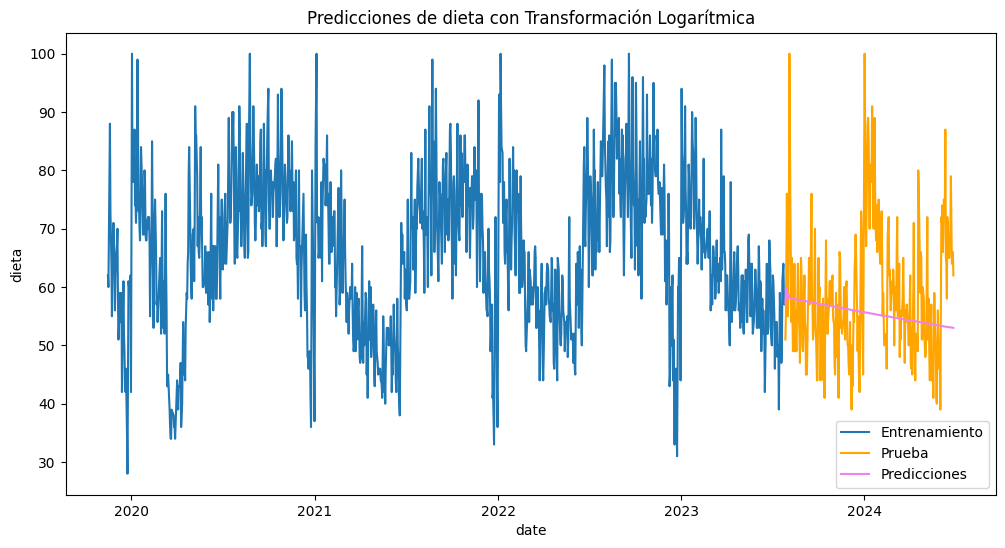

In [ ]:
# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(12, 6))
plt.plot(train['date'], train['dieta'], label='Entrenamiento')
plt.plot(test['date'], test['dieta'], label='Prueba', color='orange')
plt.plot(test['date'], predicted_values, label='Predicciones', color='violet')
plt.xlabel('date')
plt.ylabel('dieta')
plt.title('Predicciones de dieta con Transformación Logarítmica')
plt.legend()
plt.show()

### Rolling Forecast

SARIMA con BOX-COX

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.special import inv_boxcox
from scipy.stats import boxcox

# Ordenar el DataFrame por fecha
df_sorted = df_filtrado.sort_values('date', ascending=True)

# Separar el dataset en entrenamiento (80%) y prueba (20%)
train_size = int(len(df_sorted) * 0.8)
train, test = df_sorted.iloc[:train_size], df_sorted.iloc[train_size:]

# Aplicar la transformación de Box-Cox a los datos de entrenamiento
train_boxcox, lam = boxcox(train['dieta'])

# Ajuste del modelo SARIMA en el conjunto de entrenamiento transformado
boxcox_rolling_forecast_model = auto_arima(train_boxcox,
                                           seasonal=True, m=6,
                                           trace=True, error_action='ignore',
                                           suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[6] intercept   : AIC=8159.804, Time=7.45 sec
 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=9191.554, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[6] intercept   : AIC=8237.640, Time=3.33 sec
 ARIMA(0,0,1)(0,0,1)[6] intercept   : AIC=8465.540, Time=1.90 sec
 ARIMA(0,0,0)(0,0,0)[6]             : AIC=12706.927, Time=0.07 sec
 ARIMA(2,0,2)(0,0,1)[6] intercept   : AIC=8169.602, Time=7.41 sec
 ARIMA(2,0,2)(1,0,0)[6] intercept   : AIC=8155.229, Time=8.72 sec
 ARIMA(2,0,2)(0,0,0)[6] intercept   : AIC=8243.251, Time=5.79 sec
 ARIMA(2,0,2)(2,0,0)[6] intercept   : AIC=8145.039, Time=13.38 sec
 ARIMA(2,0,2)(2,0,1)[6] intercept   : AIC=inf, Time=15.56 sec
 ARIMA(1,0,2)(2,0,0)[6] intercept   : AIC=8142.991, Time=14.24 sec
 ARIMA(1,0,2)(1,0,0)[6] intercept   : AIC=8151.663, Time=4.72 sec
 ARIMA(1,0,2)(2,0,1)[6] intercept   : AIC=inf, Time=9.16 sec
 ARIMA(1,0,2)(1,0,1)[6] intercept   : AIC=8139.632, Time=4.53 sec
 ARIMA(1,0,2)(0,0,1)[6] intercept   : A

RMSE: 8.760691155695929
MAE: 6.7795997546742015


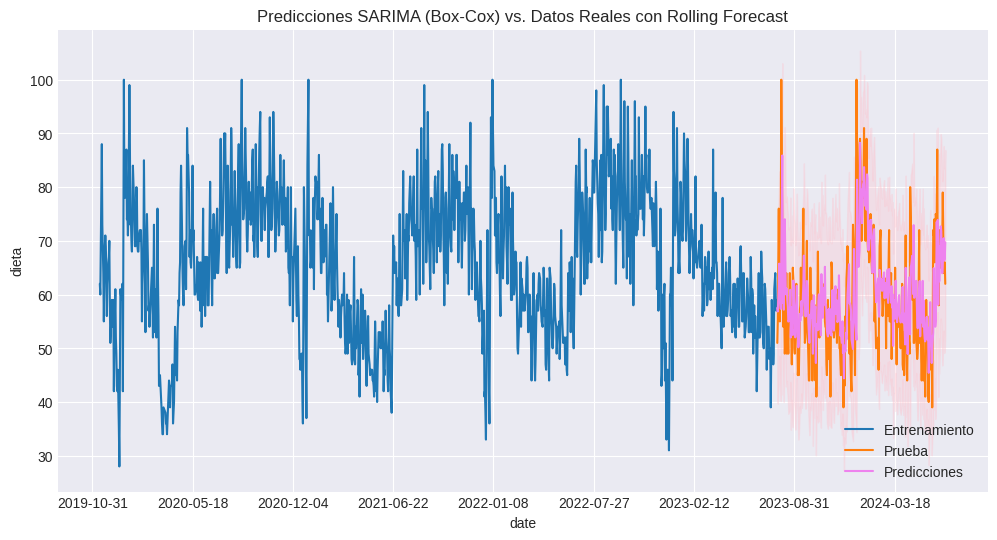

In [ ]:
# Predicciones con rolling forecast
predictions_boxcox = []
history = list(train_boxcox)
for t in range(len(test)):
    model = boxcox_rolling_forecast_model.fit(history)
    yhat = model.predict(n_periods=1)
    predictions_boxcox.append(yhat[0])
    # Actualizar el historial con el valor real transformado (Box-Cox)
    actual_transformed = boxcox([test['dieta'].iloc[t]], lam)
    history.append(actual_transformed[0])

# Invertir la transformación de Box-Cox en las predicciones
predictions = inv_boxcox(predictions_boxcox, lam)

# Calcular las métricas de performance
rmse = np.sqrt(mean_squared_error(test['dieta'], predictions))
mae = mean_absolute_error(test['dieta'], predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train['date'], train['dieta'], label='Entrenamiento')
plt.plot(test['date'], test['dieta'], label='Prueba')
plt.plot(test['date'], predictions, label='Predicciones', color='violet')
plt.fill_between(test['date'], predictions - 1.96 * rmse, predictions + 1.96 * rmse, color='pink', alpha=0.3)

# Formatear los ejes para evitar notación científica
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel('date')
plt.ylabel('dieta')
plt.title('Predicciones SARIMA (Box-Cox) vs. Datos Reales con Rolling Forecast')
plt.legend()
plt.show()

SARIMA con tranformación Logística

In [ ]:
# Predicciones con rolling forecast
predictions_log = []
history = list(train['dieta_log'])
for t in range(len(test)):
    model = log_model_with_train.fit(history)
    yhat = model.predict(n_periods=1)
    predictions_log.append(yhat[0])
    # Actualizar el historial con el valor real transformado (log)
    actual_transformed = np.log(test['dieta'].iloc[t])
    history.append(actual_transformed)

# Invertir la transformación logarítmica en las predicciones
predictions = np.exp(predictions_log)

# Calcular las métricas de performance
rmse = np.sqrt(mean_squared_error(test['dieta'], predictions))
mae = mean_absolute_error(test['dieta'], predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 3.428427800879514
MAE: 0.43291540667389466


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Asegurarse de que la columna 'FECHA' es tipo datetime
df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])

# Ordenar el DataFrame por fecha
df_filtrado = df_filtrado.sort_values('date', ascending=True)

# Separar el dataset en entrenamiento (80%) y prueba (20%)
train_size = int(len(df_filtrado) * 0.8)
train, test = df_filtrado.iloc[:train_size].copy(), df_filtrado.iloc[train_size:].copy()

# Aplicar la transformación logarítmica a los datos de entrenamiento
train['dieta_log'] = np.log(train['dieta'])
test['dieta_log'] = np.log(test['dieta'])

# Ajuste del modelo SARIMA en el conjunto de entrenamiento transformado
log_rolling_forecast_model = auto_arima(train['dieta_log'],
                                        seasonal=True, m=6,
                                        trace=True, error_action='ignore',
                                        suppress_warnings=True)

# Predicciones con rolling forecast
predictions_log = []
history = list(train['dieta_log'])
for t in range(len(test)):
    model = log_rolling_forecast_model.fit(history)
    yhat = model.predict(n_periods=1)
    predictions_log.append(yhat[0])
    # Actualizar el historial con el valor real transformado (log)
    actual_transformed = np.log(test['dieta'].iloc[t])
    history.append(actual_transformed)

# Invertir la transformación logarítmica en las predicciones
predictions = np.exp(predictions_log)

# Calcular las métricas de performance
rmse = np.sqrt(mean_squared_error(test['dieta'], predictions))
mae = mean_absolute_error(test['dieta'], predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train['date'], train['dieta'], label='Entrenamiento')
plt.plot(test['date'], test['dieta'], label='Prueba', color='orange')
plt.plot(test['date'], predictions, label='Predicciones', color='violet')
plt.fill_between(test['date'], predictions - 1.96 * rmse, predictions + 1.96 * rmse, color='pink', alpha=0.3)

# Formatear los ejes para evitar notación científica
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel('date')
plt.ylabel('dieta')
plt.title('Predicciones SARIMA (Log) vs. Datos Reales con Rolling Forecast')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[6] intercept   : AIC=-998.471, Time=14.13 sec
 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=-333.079, Time=0.74 sec
 ARIMA(1,0,0)(1,0,0)[6] intercept   : AIC=inf, Time=4.70 sec
 ARIMA(0,0,1)(0,0,1)[6] intercept   : AIC=-1084.382, Time=2.06 sec
 ARIMA(0,0,0)(0,0,0)[6]             : AIC=6290.073, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[6] intercept   : AIC=-857.591, Time=1.01 sec
 ARIMA(0,0,1)(1,0,1)[6] intercept   : AIC=-1042.715, Time=10.06 sec
 ARIMA(0,0,1)(0,0,2)[6] intercept   : AIC=-1137.094, Time=4.02 sec
 ARIMA(0,0,1)(1,0,2)[6] intercept   : AIC=-937.472, Time=17.34 sec
 ARIMA(0,0,0)(0,0,2)[6] intercept   : AIC=-857.611, Time=3.30 sec
 ARIMA(1,0,1)(0,0,2)[6] intercept   : AIC=-1381.165, Time=15.49 sec
 ARIMA(1,0,1)(0,0,1)[6] intercept   : AIC=-1369.325, Time=7.40 sec
 ARIMA(1,0,1)(1,0,2)[6] intercept   : AIC=-1266.460, Time=18.12 sec
 ARIMA(1,0,1)(1,0,1)[6] intercept   : AIC=-1266.367, Time=13.45 sec
 ARIMA(1,0,0)(0,0,2)[6] i

### Efectuar un Análisis de Diagnóstico de las series temporales (Análisis sobre los Residuos del modelo, análisis gráfico de FAC, test de Ljung-Box, etc.).

Para responder esta pregunta utilizamos los resultados del último modelo desarrollado (model) que separa entre train y test.

Procedemos a realizar un análisis detallado de los residuos:

BOX-COX

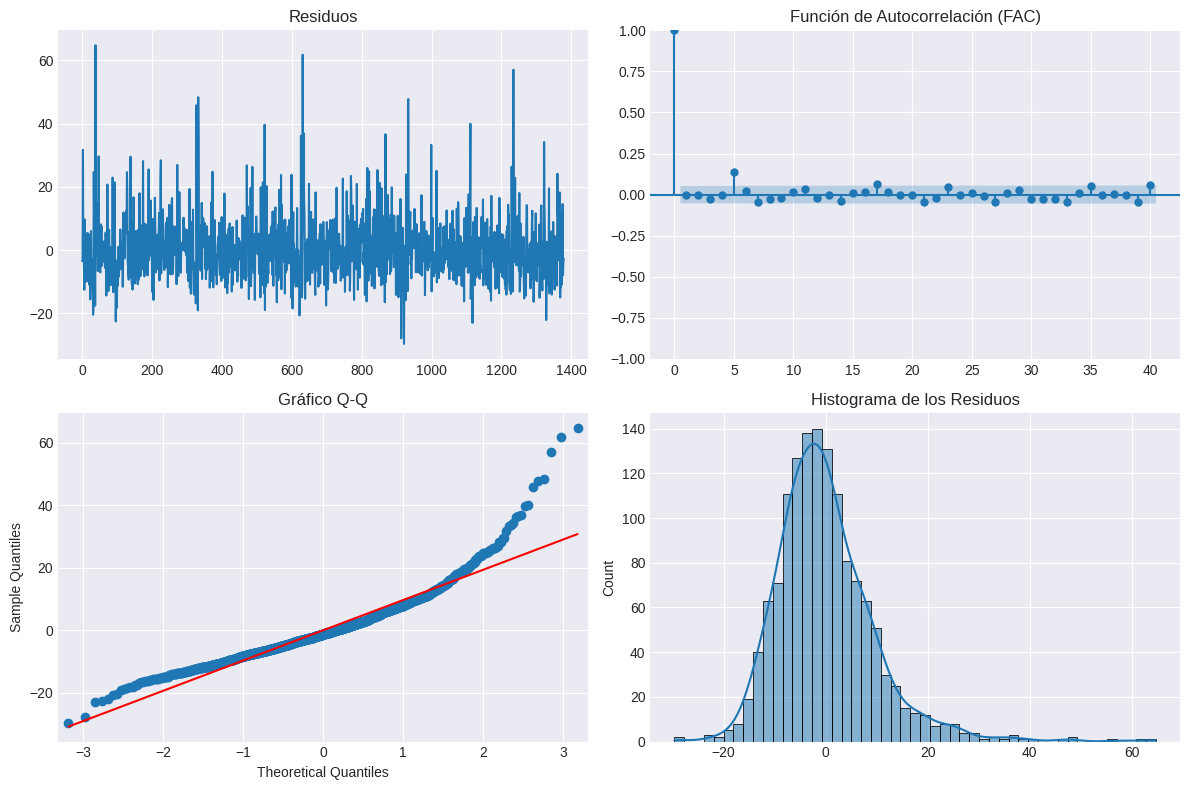

Prueba de Ljung-Box:
    lb_stat  lb_pvalue
10    33.50       0.00
Test de Shapiro-Wilk:
Estadístico: 0.9217715859413147, p-valor: 3.729249025538958e-26


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox

# Obtener los residuos del modelo ajustado
residuals = model.resid()

# Crear la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Graficar los residuos
sns.lineplot(data=residuals, ax=axs[0, 0])
axs[0, 0].set_title('Residuos')

# Graficar FAC de los residuos
plot_acf(residuals, lags=40, ax=axs[0, 1])
axs[0, 1].set_title('Función de Autocorrelación (FAC)')

# Graficar Q-Q plot de los residuos
sm.qqplot(residuals, line='s', ax=axs[1, 0])
axs[1, 0].set_title('Gráfico Q-Q')

# Histograma y KDE de los residuos
sns.histplot(residuals, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Histograma de los Residuos')

plt.tight_layout()
plt.show()

# Realizar la prueba de Ljung-Box
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print('Prueba de Ljung-Box:')
print(ljung_box_test)

# Aplicar el test de Shapiro-Wilk a los residuos
shapiro_test = shapiro(residuals)
print('Test de Shapiro-Wilk:')
print(f'Estadístico: {shapiro_test.statistic}, p-valor: {shapiro_test.pvalue}')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[6] intercept   : AIC=6166.970, Time=7.15 sec
 ARIMA(0,1,0)(0,0,0)[6] intercept   : AIC=6611.849, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[6] intercept   : AIC=6405.801, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[6] intercept   : AIC=6255.667, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[6]             : AIC=6609.849, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[6] intercept   : AIC=6188.767, Time=2.43 sec
 ARIMA(2,1,2)(1,0,0)[6] intercept   : AIC=6177.684, Time=3.36 sec
 ARIMA(2,1,2)(2,0,1)[6] intercept   : AIC=6168.946, Time=13.53 sec
 ARIMA(2,1,2)(1,0,2)[6] intercept   : AIC=6168.940, Time=10.37 sec
 ARIMA(2,1,2)(0,0,0)[6] intercept   : AIC=6221.057, Time=1.23 sec
 ARIMA(2,1,2)(0,0,2)[6] intercept   : AIC=6179.603, Time=7.01 sec
 ARIMA(2,1,2)(2,0,0)[6] intercept   : AIC=6170.928, Time=5.63 sec
 ARIMA(2,1,2)(2,0,2)[6] intercept   : AIC=6170.589, Time=12.18 sec
 ARIMA(1,1,2)(1,0,1)[6] intercept   : AIC=6164.586, Time=5.43 sec
 ARIMA(1,1,2)(0,0,1)[6] interc

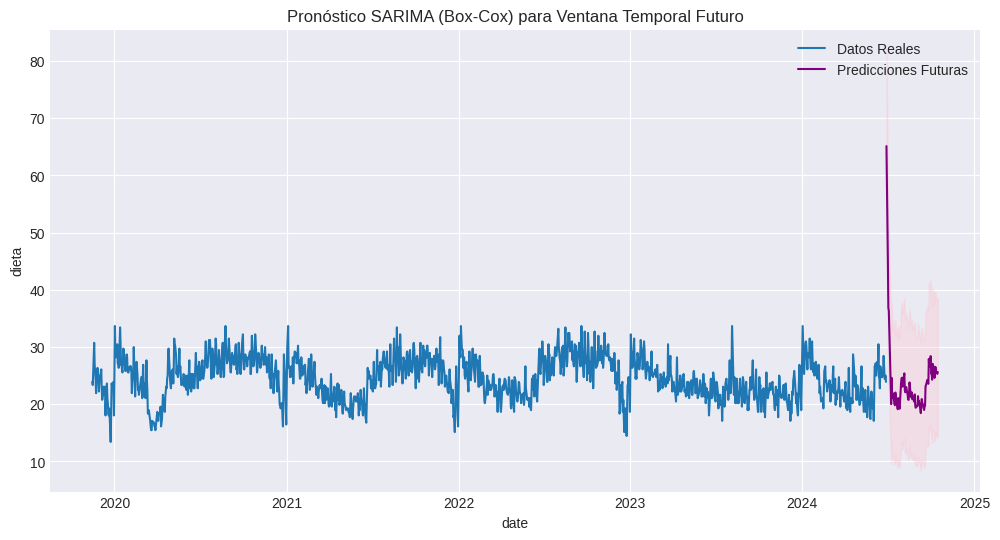

In [ ]:
######  VERSION FINAL PARA EL PUNTO DE LAS PREDICCIONES FUTURAS
from scipy.stats import boxcox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Transformar los datos utilizando Box-Cox y determinar el mejor valor para lambda
df_sorted = df_filtrado.sort_values('date', ascending=True)

# Asegúrate de que no hay valores negativos o cero en 'Monto_deflactado'
df_sorted['dieta'] = df_sorted['dieta'].replace(0, np.nan)  # Opcional: reemplazar ceros con NaN para evitarlos
df_sorted['dieta'] = df_sorted['dieta'].dropna()  # Eliminar NaNs

# Aplicar Box-Cox transformando los valores a positivos
df_sorted['dieta'], lam = boxcox(df_sorted['dieta'] + 1)  # Añadir 1 para evitar problemas con valores cero o negativos

# Definir la función para el pronóstico con Rolling Forecast usando Box-Cox
def rolling_forecast_boxcox(model, train, lam, steps=78):
    history = list(train['dieta'])
    predictions = []
    conf_ints = []

    for t in range(steps):
        model_fit = model.fit(history)
        yhat, conf_int = model_fit.predict(n_periods=1, return_conf_int=True)
        predictions.append(yhat[0])
        conf_ints.append(conf_int[0])
        actual_transformed = boxcox([train['dieta'].iloc[-steps + t] + 1], lmbda=lam)[0]  # Transformar y agregar al historial
        history.append(actual_transformed)

    return predictions, conf_ints

# Ajuste automático del modelo SARIMA con transformación Box-Cox
boxcox_rolling_forecast_model = auto_arima(df_sorted['dieta'],
                                           seasonal=True, m=6,
                                           trace=True, error_action='ignore',
                                           suppress_warnings=True)

# Realizar el pronóstico para los próximos 78 días
future_predictions_boxcox, conf_ints_boxcox = rolling_forecast_boxcox(boxcox_rolling_forecast_model, df_sorted, lam, steps=78)
future_predictions_boxcox_inverse = inv_boxcox(np.array(future_predictions_boxcox), lam) - 1  # Invertir la transformación

# Crear un rango de fechas para las predicciones futuras
last_date = df_sorted['date'].max()
future_dates = pd.date_range(start=last_date, periods=79, freq='B')[1:]  # Saltar el primer día para empezar después del último dato conocido

# Crear DataFrame para las predicciones futuras
future_df_boxcox = pd.DataFrame({'date': future_dates, 'Predicciones': future_predictions_boxcox_inverse})

# Invertir la transformación de Box-Cox en los intervalos de confianza
conf_ints_boxcox_inverse = inv_boxcox(np.array(conf_ints_boxcox).flatten(), lam) - 1
conf_ints_boxcox_inverse = conf_ints_boxcox_inverse.reshape(-1, 2)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['date'], df_sorted['dieta'], label='Datos Reales')
plt.plot(future_df_boxcox['date'], future_df_boxcox['Predicciones'], label='Predicciones Futuras', color='purple')
plt.fill_between(future_df_boxcox['date'], conf_ints_boxcox_inverse[:, 0], conf_ints_boxcox_inverse[:, 1], color='pink', alpha=0.3)
plt.xlabel('date')
plt.ylabel('dieta')
plt.title('Pronóstico SARIMA (Box-Cox) para Ventana Temporal Futuro')
plt.legend()
plt.show()

Logarítmica

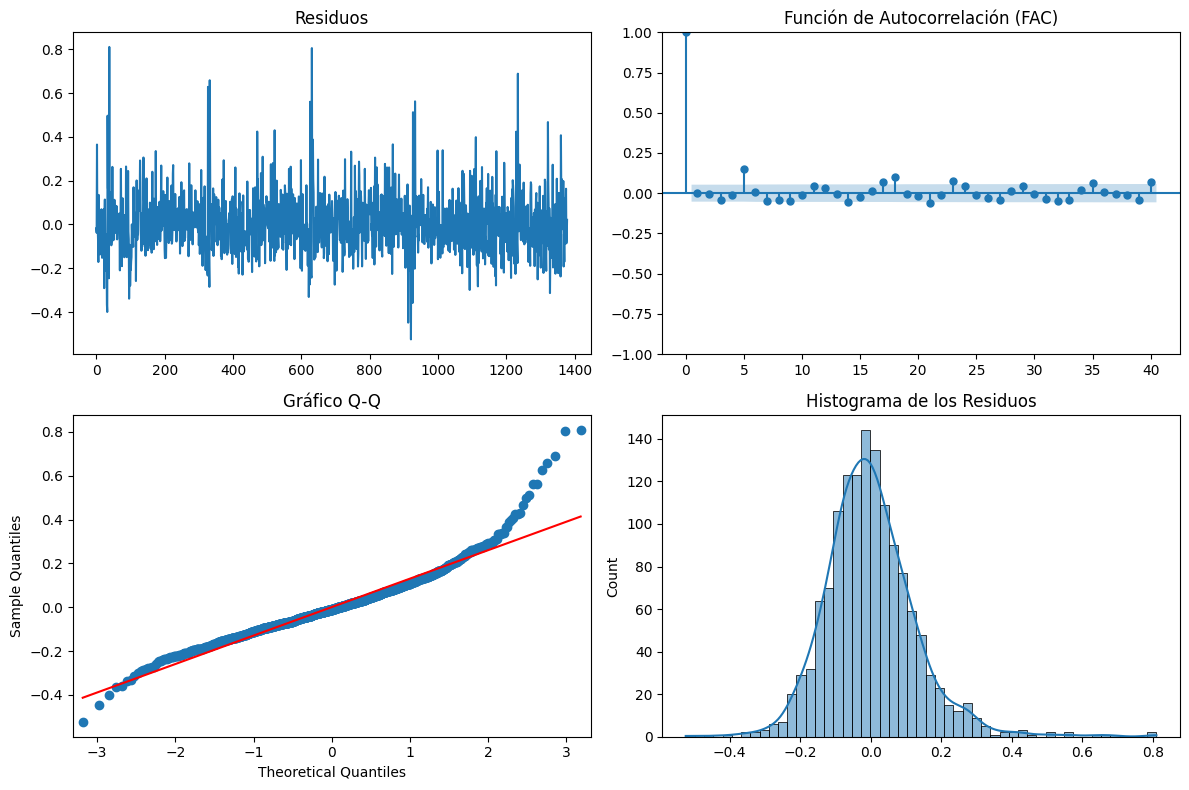

Prueba de Ljung-Box:
    lb_stat  lb_pvalue
10    44.16       0.00
Test de Shapiro-Wilk:
Estadístico: 0.9474954009056091, p-valor: 9.199907417627784e-22


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox

# Obtener los residuos del modelo ajustado
residuals = model.resid()

# Crear la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Graficar los residuos
sns.lineplot(data=residuals, ax=axs[0, 0])
axs[0, 0].set_title('Residuos')

# Graficar FAC de los residuos
plot_acf(residuals, lags=40, ax=axs[0, 1])
axs[0, 1].set_title('Función de Autocorrelación (FAC)')

# Graficar Q-Q plot de los residuos
sm.qqplot(residuals, line='s', ax=axs[1, 0])
axs[1, 0].set_title('Gráfico Q-Q')

# Histograma y KDE de los residuos
sns.histplot(residuals, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Histograma de los Residuos')

plt.tight_layout()
plt.show()

# Realizar la prueba de Ljung-Box
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print('Prueba de Ljung-Box:')
print(ljung_box_test)

# Aplicar el test de Shapiro-Wilk a los residuos
shapiro_test = shapiro(residuals)
print('Test de Shapiro-Wilk:')
print(f'Estadístico: {shapiro_test.statistic}, p-valor: {shapiro_test.pvalue}')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from scipy.special import inv_boxcox
from scipy.stats import boxcox

# Ordenar el DataFrame por fecha
df_filtrado = df_filtrado.sort_values('date', ascending=True)

# Aplicar la transformación logarítmica
df_filtrado['dieta_log'] = np.log(df_filtrado['dieta'])

# Definir la función para el pronóstico con Rolling Forecast usando Log
def rolling_forecast_log(model, train, steps=79):
    history = list(train['dieta_log'])
    predictions = []
    conf_ints = []

    for t in range(steps):
        model_fit = model.fit(history)
        yhat, conf_int = model_fit.predict(n_periods=1, return_conf_int=True)
        predictions.append(yhat[0])
        conf_ints.append(conf_int[0])
        # Transformar y agregar al historial solo si estamos en una etapa de pronóstico
        if t + 1 < len(train['dieta_log']):
            actual_transformed = train['dieta_log'].iloc[-steps + t + 1]  # Usar el valor actual transformado
            history.append(actual_transformed)

    return predictions, conf_ints

# Ajuste automático del modelo SARIMA con transformación Log
log_rolling_forecast_model = auto_arima(df_filtrado['dieta_log'],
                                        seasonal=True, m=6,
                                        trace=True, error_action='ignore',
                                        suppress_warnings=True)

# Realizar el pronóstico para los próximos 79 días
future_predictions_log, conf_ints_log = rolling_forecast_log(log_rolling_forecast_model, df_filtrado, steps=79)
future_predictions_log_inverse = np.exp(future_predictions_log)  # Invertir la transformación logarítmica

# Crear un rango de fechas para las predicciones futuras
last_date = df_filtrado['date'].max()
future_dates = pd.date_range(start=last_date, periods=80, freq='B')[1:]  # Crear un rango de fechas de 80 días y saltar el primer día

# Crear DataFrame para las predicciones futuras
future_df_log = pd.DataFrame({'date': future_dates, 'Predicciones': future_predictions_log_inverse})

# Invertir la transformación logarítmica en los intervalos de confianza
conf_ints_log_inverse = np.exp(np.array(conf_ints_log))
conf_ints_log_inverse = conf_ints_log_inverse.reshape(-1, 2)  # Volver a dar forma a los intervalos de confianza

# Añadir los intervalos de confianza al DataFrame de predicciones futuras
future_df_log['Conf_Int_Lower'] = conf_ints_log_inverse[:, 0]
future_df_log['Conf_Int_Upper'] = conf_ints_log_inverse[:, 1]


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[6] intercept   : AIC=-1682.413, Time=16.80 sec
 ARIMA(0,1,0)(0,0,0)[6] intercept   : AIC=-1264.772, Time=0.42 sec
 ARIMA(1,1,0)(1,0,0)[6] intercept   : AIC=-1456.700, Time=3.96 sec
 ARIMA(0,1,1)(0,0,1)[6] intercept   : AIC=-1605.006, Time=3.42 sec
 ARIMA(0,1,0)(0,0,0)[6]             : AIC=-1266.772, Time=0.55 sec
 ARIMA(2,1,2)(0,0,1)[6] intercept   : AIC=-1667.722, Time=14.56 sec
 ARIMA(2,1,2)(1,0,0)[6] intercept   : AIC=-1675.392, Time=9.78 sec
 ARIMA(2,1,2)(2,0,1)[6] intercept   : AIC=-1680.299, Time=13.99 sec
 ARIMA(2,1,2)(1,0,2)[6] intercept   : AIC=-1680.316, Time=10.94 sec
 ARIMA(2,1,2)(0,0,0)[6] intercept   : AIC=-1643.019, Time=2.90 sec
 ARIMA(2,1,2)(0,0,2)[6] intercept   : AIC=-1674.174, Time=10.71 sec
 ARIMA(2,1,2)(2,0,0)[6] intercept   : AIC=-1679.990, Time=12.52 sec
 ARIMA(2,1,2)(2,0,2)[6] intercept   : AIC=-1678.625, Time=11.06 sec
 ARIMA(1,1,2)(1,0,1)[6] intercept   : AIC=-1677.401, Time=5.64 sec
 ARIMA(2,1,1

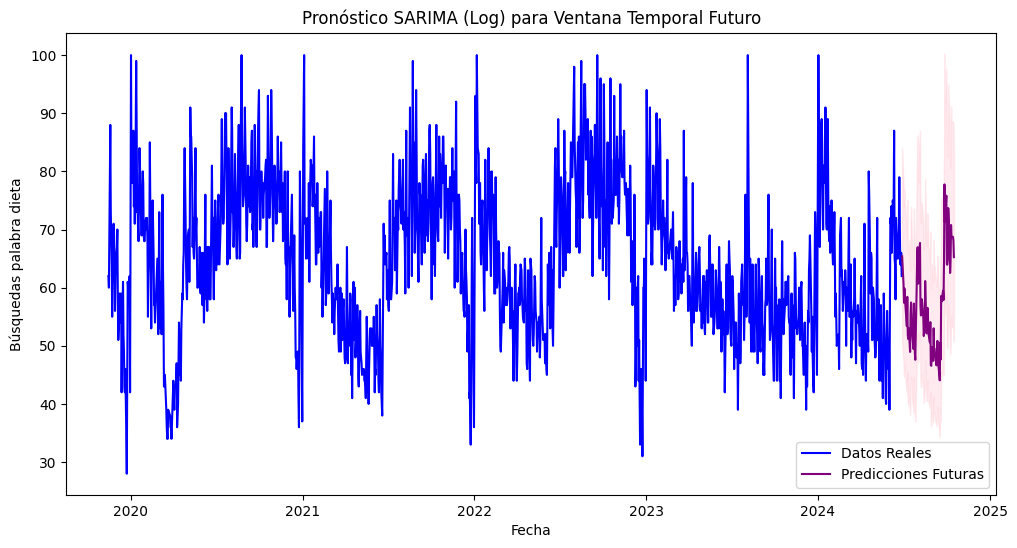

In [ ]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df_filtrado['date'], df_filtrado['dieta'], label='Datos Reales', color='blue')
plt.plot(future_df_log['date'], future_df_log['Predicciones'], label='Predicciones Futuras', color='purple')
plt.fill_between(future_df_log['date'], future_df_log['Conf_Int_Lower'], future_df_log['Conf_Int_Upper'], color='pink', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Búsquedas palabra dieta')
plt.title('Pronóstico SARIMA (Log) para Ventana Temporal Futuro')
plt.legend()
plt.show()
